<a href="https://colab.research.google.com/github/Ludwig018/Quantuim-Data-Analytics-/blob/main/Rework_Quantuim_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [87]:
T_data = pd.read_excel('QVI_transaction_data.xlsx')
T_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [88]:

# Rename the columns by specifying new names in a dictionary
new_column_names = {
    'DATE': 'Transaction_Date',
    'STORE_NBR': 'Store_Number',
    'LYLTY_CARD_NBR': 'Loyalty_Card_Number',
    'TXN_ID': 'Transaction_ID',
    'PROD_NBR': 'Product_Number',
    'PROD_NAME': 'Product_Name',
    'PROD_QTY': 'Product_Quantity',
    'TOT_SALES': 'Total_Sales',
    'PACK_SIZE': 'PACK_SIZE(IN grams)'
}

# Apply the new column names to the DataFrame
T_data.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame to confirm column names have been changed
print("Renamed Columns:", T_data.columns)


Renamed Columns: Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Name', 'Product_Quantity',
       'Total_Sales'],
      dtype='object')


In [89]:
T_data.tail()

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [90]:
# Converted Excel serial date to datetime
T_data['Transaction_Date'] = pd.to_datetime(T_data['Transaction_Date'], unit='D', origin='1899-12-30')
T_data.head()


,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [91]:
# Specified the new order of columns
new_column_order = [
    'Transaction_Date',
    'Transaction_ID',
    'Loyalty_Card_Number',
    'Store_Number',
    'Product_Name',
    #'Pack_size(in grams)', # Changed 'Pack_size(in grams)' to 'PACK_SIZE(IN grams)' to match the actual column name
    'Product_Number',
    'Product_Quantity',
    'Total_Sales'
]

# Reordered the DataFrame
T_data = T_data[new_column_order]

# Displayed the DataFrame with the new column order
print("Reordered Columns:", T_data.columns)

T_data.head()

Reordered Columns: Index(['Transaction_Date', 'Transaction_ID', 'Loyalty_Card_Number',
       'Store_Number', 'Product_Name', 'Product_Number', 'Product_Quantity',
       'Total_Sales'],
      dtype='object')


,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt175g,5,2,6.0
1,2019-05-14,348,1307,1,CCs Nacho Cheese 175g,66,3,6.3
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken 170g,61,2,2.9
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion 175g,69,5,15.0
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108,3,13.8


In [92]:
#Separated the Product size from product name
T_data['PACK_SIZE'] = T_data['Product_Name'].str.extract(r'(\d+g)')
print(T_data[['Product_Name', 'PACK_SIZE']])

T_data.head()



                                    Product_Name PACK_SIZE
0         Natural Chip        Compny SeaSalt175g      175g
1                       CCs Nacho Cheese    175g      175g
2         Smiths Crinkle Cut  Chips Chicken 170g      170g
3         Smiths Chip Thinly  S/Cream&Onion 175g      175g
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g      150g
...                                          ...       ...
264831   Kettle Sweet Chilli And Sour Cream 175g      175g
264832             Tostitos Splash Of  Lime 175g      175g
264833                  Doritos Mexicana    170g      170g
264834   Doritos Corn Chip Mexican Jalapeno 150g      150g
264835             Tostitos Splash Of  Lime 175g      175g

[264836 rows x 2 columns]


,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt175g,5,2,6.0,175g
1,2019-05-14,348,1307,1,CCs Nacho Cheese 175g,66,3,6.3,175g
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken 170g,61,2,2.9,170g
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion 175g,69,5,15.0,175g
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108,3,13.8,150g


In [93]:
# Remove the pack size from the product name
T_data['Product_Name'] = T_data['Product_Name'].str.replace(r'\s?\d+[gG]', '', regex=True)

print(T_data[['Product_Name']])

T_data

                               Product_Name
0        Natural Chip        Compny SeaSalt
1                       CCs Nacho Cheese   
2         Smiths Crinkle Cut  Chips Chicken
3         Smiths Chip Thinly  S/Cream&Onion
4       Kettle Tortilla ChpsHny&Jlpno Chili
...                                     ...
264831   Kettle Sweet Chilli And Sour Cream
264832             Tostitos Splash Of  Lime
264833                  Doritos Mexicana   
264834   Doritos Corn Chip Mexican Jalapeno
264835             Tostitos Splash Of  Lime

[264836 rows x 1 columns]


,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt,5,2,6.0,175g
1,2019-05-14,348,1307,1,CCs Nacho Cheese,66,3,6.3,175g
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken,61,2,2.9,170g
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion,69,5,15.0,175g
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili,108,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,270088,272319,272,Kettle Sweet Chilli And Sour Cream,89,2,10.8,175g
264832,2018-08-13,270154,272358,272,Tostitos Splash Of Lime,74,1,4.4,175g
264833,2018-11-06,270187,272379,272,Doritos Mexicana,51,2,8.8,170g
264834,2018-12-27,270188,272379,272,Doritos Corn Chip Mexican Jalapeno,42,2,7.8,150g


In [94]:
T_data

,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt,5,2,6.0,175g
1,2019-05-14,348,1307,1,CCs Nacho Cheese,66,3,6.3,175g
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken,61,2,2.9,170g
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion,69,5,15.0,175g
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili,108,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,270088,272319,272,Kettle Sweet Chilli And Sour Cream,89,2,10.8,175g
264832,2018-08-13,270154,272358,272,Tostitos Splash Of Lime,74,1,4.4,175g
264833,2018-11-06,270187,272379,272,Doritos Mexicana,51,2,8.8,170g
264834,2018-12-27,270188,272379,272,Doritos Corn Chip Mexican Jalapeno,42,2,7.8,150g


In [95]:
C_data = pd.read_csv('QVI_purchase_behaviour.csv')
C_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [96]:
#Rename the columns of then customer data
new_column_names = {
    'LYLTY_CARD_NBR': 'Loyalty_Card_Number'
}


C_data.rename(columns=new_column_names, inplace=True)
print("Renamed Columns:", C_data.columns)

Renamed Columns: Index(['Loyalty_Card_Number', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [97]:
C_data.tail()

,Loyalty_Card_Number,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [98]:
T_data.info()
T_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Transaction_Date     264836 non-null  datetime64[ns]
 1   Transaction_ID       264836 non-null  int64         
 2   Loyalty_Card_Number  264836 non-null  int64         
 3   Store_Number         264836 non-null  int64         
 4   Product_Name         264836 non-null  object        
 5   Product_Number       264836 non-null  int64         
 6   Product_Quantity     264836 non-null  int64         
 7   Total_Sales          264836 non-null  float64       
 8   PACK_SIZE            258772 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Number,Product_Quantity,Total_Sales
count,264836,2.648360e+05,2.648360e+05,264836.00000,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,1.351583e+05,1.355495e+05,135.08011,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.000000e+00,1.000000e+03,1.00000,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,6.760150e+04,7.002100e+04,70.00000,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,1.351375e+05,1.303575e+05,130.00000,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,2.027012e+05,2.030942e+05,203.00000,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,2.415841e+06,2.373711e+06,272.00000,114.000000,200.000000,650.000000
std,NaN,7.813303e+04,8.057998e+04,76.78418,32.826638,0.643654,3.083226


In [99]:
T_data.isnull().sum()

,0
Transaction_Date,0
Transaction_ID,0
Loyalty_Card_Number,0
Store_Number,0
Product_Name,0
Product_Number,0
Product_Quantity,0
Total_Sales,0
PACK_SIZE,6064


In [100]:
T_data['PACK_SIZE'].fillna(method='ffill', inplace=True)

In [101]:
T_data['PACK_SIZE'] = T_data['PACK_SIZE'].str.extract(r'(\d+)').astype(float)

In [102]:
import pandas as pd

#Load your data
# T_data = pd.read_excel('QVI_transaction_data.xlsx')

#Extract numeric part of 'PACK_SIZE' and convert to float
#T_data['PACK_SIZE'] = T_data['PACK_SIZE'].str.extract(r'(\d+)').astype(float)

#Handle missing values in 'PACK_SIZE'
# Fill missing values with the median of the column
T_data['PACK_SIZE'].fillna(T_data['PACK_SIZE'].median(), inplace=True)

#Drop rows where 'PACK_SIZE' is missing
# T_data = T_data.dropna(subset=['PACK_SIZE'])

#Forward fill missing values in 'PACK_SIZE'
# T_data['PACK_SIZE'].fillna(method='ffill', inplace=True)

#Verify the results
print("Remaining null values in PACK_SIZE:", T_data['PACK_SIZE'].isnull().sum())
print("Sample data after cleaning:")
print(T_data[['PACK_SIZE']].head())


Remaining null values in PACK_SIZE: 0
Sample data after cleaning:
   PACK_SIZE
0      175.0
1      175.0
2      170.0
3      175.0
4      150.0


In [103]:
new_column_names = {
    'PACK_SIZE': 'PACK_SIZE(in grams)'
}

new_column_names = {
    'PACK_SIZE': 'PACK_SIZE(in grams)'
}

# Use the correct variable name 'new_column_names' here:
T_data.rename(columns=new_column_names, inplace=True)
T_data['PACK_SIZE(in grams)'] =  T_data['PACK_SIZE(in grams)']

In [104]:
T_data.head()

,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE(in grams)
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt,5,2,6.0,175.0
1,2019-05-14,348,1307,1,CCs Nacho Cheese,66,3,6.3,175.0
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken,61,2,2.9,170.0
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion,69,5,15.0,175.0
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili,108,3,13.8,150.0


In [105]:
cleaned_csv_transaction_data = "cleaned_transaction_data.csv"
T_data.to_csv(cleaned_csv_transaction_data, index=False)

In [106]:
df = pd.read_csv(cleaned_csv_transaction_data)
df.head()

,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE(in grams)
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt,5,2,6.0,175.0
1,2019-05-14,348,1307,1,CCs Nacho Cheese,66,3,6.3,175.0
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken,61,2,2.9,170.0
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion,69,5,15.0,175.0
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili,108,3,13.8,150.0


In [107]:
C_data.isnull().sum()

,0
Loyalty_Card_Number,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [108]:
#rename the coulumns in C_data
new_column_names =  {
    'LIFESTAGE': 'Lifestage',
    'PREMIUM_CUSTOMER': 'Premium_Customer',
    'LYLTY_CARD_NBR': 'Loyalty_Card_Number',
    }

C_data.rename(columns=new_column_names, inplace=True)
print("Renamed Columns:", C_data.columns)

Renamed Columns: Index(['Loyalty_Card_Number', 'Lifestage', 'Premium_Customer'], dtype='object')


In [109]:
# Rename the column 'LOYALTY_CARD_NUMBER' to 'Loyalty_Card_Number'
C_data.rename(columns={'LOYALTY_CARD_NUMBER': 'Loyalty_Card_Number'}, inplace=True)

# Check if the column is renamed
print(C_data.columns)



Index(['Loyalty_Card_Number', 'Lifestage', 'Premium_Customer'], dtype='object')


In [110]:
C_data.info()
C_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Loyalty_Card_Number  72637 non-null  int64 
 1   Lifestage            72637 non-null  object
 2   Premium_Customer     72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,Loyalty_Card_Number
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [111]:
cleaned_csv_customer_data = "cleaned_customer_data.csv"
C_data.to_csv(cleaned_csv_customer_data, index=False)

In [112]:
import pandas as pd

# Loaded the cleaned customer data
customer_data = pd.read_csv('cleaned_customer_data.csv')

# Loaded the cleaned transaction data
transaction_data = pd.read_csv('cleaned_transaction_data.csv')

customer_data.head()


# Merged on 'Loyalty_Card_Number' (or any other common column name)
merged_data = pd.merge(customer_data, transaction_data, on='Loyalty_Card_Number', how='inner')  # Use 'inner', 'left', 'right', or 'outer'

# Displayed the first few rows of the merged dataset
print(merged_data.head())


   Loyalty_Card_Number              Lifestage Premium_Customer  \
0                 1000  YOUNG SINGLES/COUPLES          Premium   
1                 1002  YOUNG SINGLES/COUPLES       Mainstream   
2                 1003         YOUNG FAMILIES           Budget   
3                 1003         YOUNG FAMILIES           Budget   
4                 1004  OLDER SINGLES/COUPLES       Mainstream   

  Transaction_Date  Transaction_ID  Store_Number  \
0       2018-10-17               1             1   
1       2018-09-16               2             1   
2       2019-03-07               3             1   
3       2019-03-08               4             1   
4       2018-11-02               5             1   

                         Product_Name  Product_Number  Product_Quantity  \
0  Natural Chip        Compny SeaSalt               5                 2   
1    Red Rock Deli Chikn&Garlic Aioli              58                 1   
2    Grain Waves Sour    Cream&Chives              52            

In [113]:
merged_csv_data = "merged_data.csv"
merged_data.to_csv(merged_csv_data, index=False)


In [114]:
merged_data.head()

,Loyalty_Card_Number,Lifestage,Premium_Customer,Transaction_Date,Transaction_ID,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE(in grams)
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,Natural Chip Compny SeaSalt,5,2,6.0,175.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,2,1,Red Rock Deli Chikn&Garlic Aioli,58,1,2.7,150.0
2,1003,YOUNG FAMILIES,Budget,2019-03-07,3,1,Grain Waves Sour Cream&Chives,52,1,3.6,150.0
3,1003,YOUNG FAMILIES,Budget,2019-03-08,4,1,Natural ChipCo Hony Soy Chckn,106,1,3.0,175.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,5,1,WW Original Stacked Chips,96,1,1.9,160.0


In [115]:
#Sum of Loyalty_Card_Number (changed column name)
C_data['Loyalty_Card_Number'].nunique()

72637

In [116]:
T_data['Loyalty_Card_Number'].nunique()

72637

In [117]:
transaction_data.head()

,Transaction_Date,Transaction_ID,Loyalty_Card_Number,Store_Number,Product_Name,Product_Number,Product_Quantity,Total_Sales,PACK_SIZE(in grams)
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt,5,2,6.0,175.0
1,2019-05-14,348,1307,1,CCs Nacho Cheese,66,3,6.3,175.0
2,2019-05-20,383,1343,1,Smiths Crinkle Cut Chips Chicken,61,2,2.9,170.0
3,2018-08-17,974,2373,2,Smiths Chip Thinly S/Cream&Onion,69,5,15.0,175.0
4,2018-08-18,1038,2426,2,Kettle Tortilla ChpsHny&Jlpno Chili,108,3,13.8,150.0


In [118]:
# Data analysis and customer segments – in your analysis make sure you define the metrics
# Look at total sales
total_revenue_for_transactions = T_data['Total_Sales'].sum()
print(f"Total Revenue for Transactions: ${total_revenue_for_transactions:.2f}")

Total Revenue for Transactions: $1934415.00


In [119]:
# Drivers of sales
#Sales by Product_Name
sales_by_Product_Name = T_data.groupby('Product_Name')['Total_Sales'].sum()
print("Sales by Product_Name:")
print(sales_by_Product_Name)

Sales by Product_Name:
Product_Name
Burger Rings                         6831.0
CCs Nacho Cheese                     5961.9
CCs Original                         6048.0
CCs Tasty Cheese                     6069.0
Cheetos Chs & Bacon Balls            9243.3
                                      ...  
WW Sour Cream &OnionStacked Chips    5323.8
WW Supreme Cheese   Corn Chips       5390.3
Woolworths Cheese   Rings            5169.6
Woolworths Medium   Salsa            4050.0
Woolworths Mild     Salsa            4234.5
Name: Total_Sales, Length: 114, dtype: float64


In [120]:
#Sales by Location(store number)
sales_by_location = T_data.groupby('Store_Number')['Total_Sales'].sum()
print("\nSales by Location:")
print(sales_by_location)


Sales by Location:
Store_Number
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: Total_Sales, Length: 272, dtype: float64


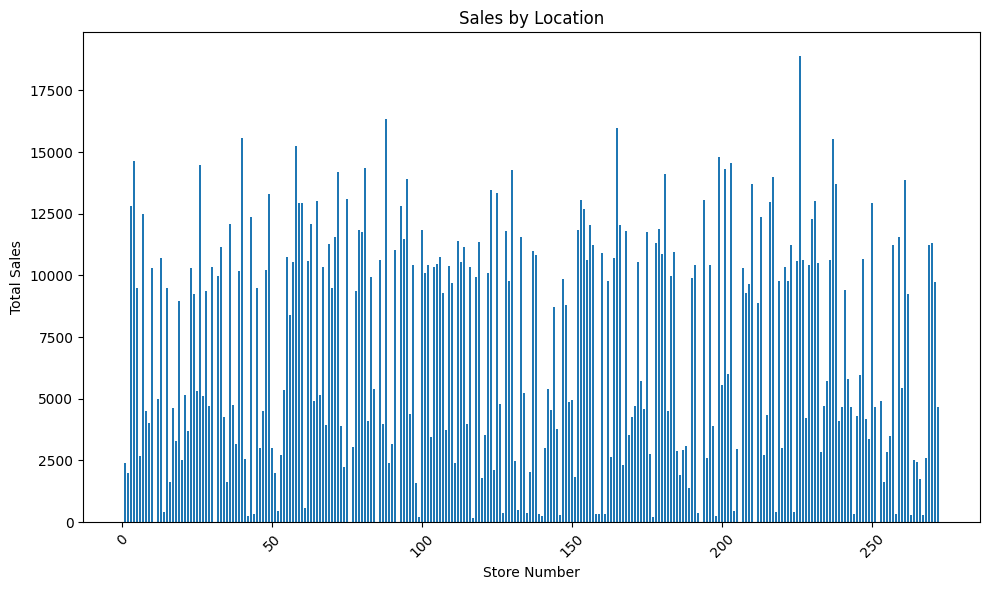

In [121]:
# Where the highest sales are coming from
# Explore the data

# Create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia.
#Barchart showing sales by location
plt.figure(figsize=(10, 6))
plt.bar(sales_by_location.index, sales_by_location.values)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Sales by Location')
plt.xticks(rotation=45)
plt.tight_layout()

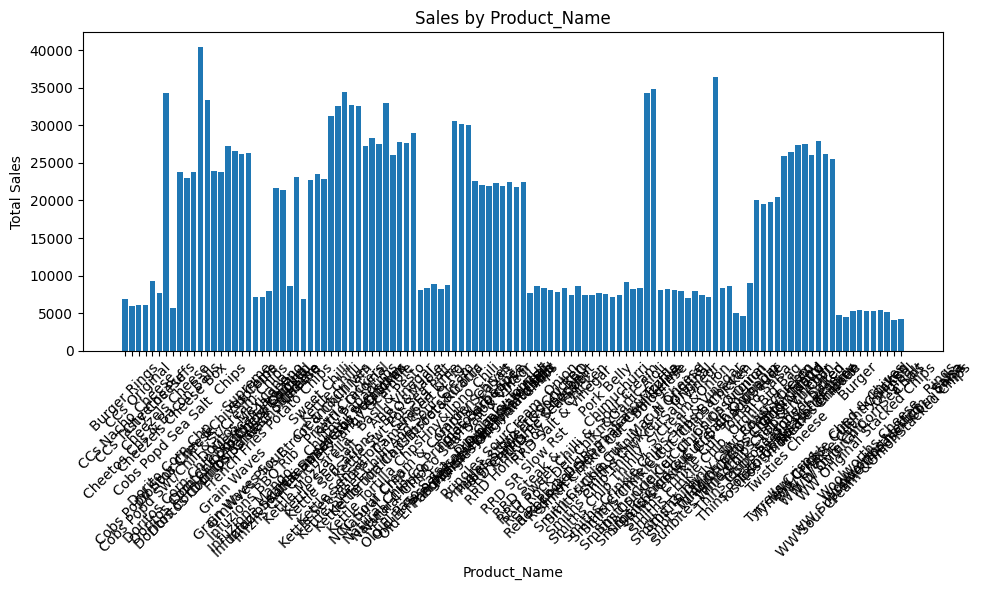

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_Product_Name.index, sales_by_Product_Name.values)
plt.xlabel('Product_Name')
plt.ylabel('Total Sales')
plt.title('Sales by Product_Name')
plt.xticks(rotation=45)
plt.tight_layout()

In [123]:
#Sales by Total sales and customers
sales_by_customers = T_data.groupby('Loyalty_Card_Number')['Total_Sales'].sum()
print("\nSales by Customers:")
print(sales_by_customers)


Sales by Customers:
Loyalty_Card_Number
1000        6.0
1002        2.7
1003        6.6
1004        1.9
1005        2.8
           ... 
2370651    13.0
2370701     7.2
2370751     9.2
2370961    18.6
2373711    11.4
Name: Total_Sales, Length: 72637, dtype: float64


In [124]:
#Total number of total sales revenue
total_Revenue_for_Transactions= T_data['Total_Sales'].sum()
print(f"Total_Revenue_for_Transactions: ${total_Revenue_for_Transactions:.2f}")

#Total number of customers
total_customers = T_data['Loyalty_Card_Number'].nunique()
print(f"Total number of customers: {total_customers}")

#Average number of transactions per customer
average_transaction_per_customer = total_customers / len(T_data)
print(f"Average number of transactions per customer: {average_transaction_per_customer:.2f}")

Total_Revenue_for_Transactions: $1934415.00
Total number of customers: 72637
Average number of transactions per customer: 0.27


In [125]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [126]:
from scipy.stats import pearsonr, ttest_ind

# Load data into dataframe
df = pd.read_csv('QVI_data.csv')

# Convert 'DATE' to datetime and extract the month for monthly analysis
df['DATE'] = pd.to_datetime(df['DATE'])
df['month'] = df['DATE'].dt.to_period('M')

# Defined the trial stores
trial_stores = [77, 86, 88]

# Calculated monthly metrics: total sales, unique customers, and avg transactions per customer
def calculate_monthly_metrics(df):
    monthly_metrics = df.groupby(['STORE_NBR', 'month']).agg(
        total_sales=('TOT_SALES', 'sum'),
        total_customers=('LYLTY_CARD_NBR', 'nunique'),
        transactions=('TXN_ID', 'count')
    ).reset_index()
    monthly_metrics['avg_transactions_per_customer'] = monthly_metrics['transactions'] / monthly_metrics['total_customers']
    return monthly_metrics

# Generated monthly metrics for each store
metrics_df = calculate_monthly_metrics(df)

# Function to find the best control store for a given trial store
def find_best_control_store(trial_store, metrics_df, control_candidates):
    trial_data = metrics_df[metrics_df['STORE_NBR'] == trial_store]

    best_store = None
    highest_corr = -1

    for control_store in control_candidates:
        control_data = metrics_df[metrics_df['STORE_NBR'] == control_store]
        merged = pd.merge(trial_data, control_data, on='month', suffixes=('_trial', '_control'))

        if len(merged) > 1:  # Ensure more than one data point for correlation
            corr, _ = pearsonr(merged['total_sales_trial'], merged['total_sales_control'])
            if corr > highest_corr:
                highest_corr = corr
                best_store = control_store

    return best_store, highest_corr

# Calculating best control stores
control_candidates = metrics_df['STORE_NBR'].unique().tolist()
control_mapping = {}
for trial_store in trial_stores:
    control_store, corr = find_best_control_store(trial_store, metrics_df, [s for s in control_candidates if s != trial_store])
    control_mapping[trial_store] = (control_store, corr)
    print(f"Best control for store {trial_store} is store {control_store} with Pearson correlation: {corr}")

# Compare metrics during trial period
def compare_trial_control(trial_store, control_store, metrics_df):
    trial_data = metrics_df[(metrics_df['STORE_NBR'] == trial_store) & (metrics_df['month'] >= '2019-01')]
    control_data = metrics_df[(metrics_df['STORE_NBR'] == control_store) & (metrics_df['month'] >= '2019-01')]

    merged = pd.merge(trial_data, control_data, on='month', suffixes=('_trial', '_control'))
    t_stat, p_val = ttest_ind(merged['total_sales_trial'], merged['total_sales_control'], equal_var=False)
    print(f"T-test for trial store {trial_store} and control store {control_store}: t-stat = {t_stat}, p-value = {p_val}")

    # Check for differences in customer count and transaction frequency
    diff_customers = merged['total_customers_trial'].mean() - merged['total_customers_control'].mean()
    diff_transactions = merged['avg_transactions_per_customer_trial'].mean() - merged['avg_transactions_per_customer_control'].mean()

    print(f"Difference in average customers: {diff_customers}")
    print(f"Difference in transactions per customer: {diff_transactions}")

# Run comparisons for each trial store
for trial_store, (control_store, _) in control_mapping.items():
    compare_trial_control(trial_store, control_store, metrics_df)


Best control for store 77 is store 11 with Pearson correlation: 1.0
Best control for store 86 is store 31 with Pearson correlation: 1.0
Best control for store 88 is store 206 with Pearson correlation: 1.0
T-test for trial store 77 and control store 11: t-stat = nan, p-value = nan
Difference in average customers: nan
Difference in transactions per customer: nan
T-test for trial store 86 and control store 31: t-stat = nan, p-value = nan
Difference in average customers: nan
Difference in transactions per customer: nan
T-test for trial store 88 and control store 206: t-stat = nan, p-value = nan
Difference in average customers: 127.0
Difference in transactions per customer: 0.265625
